<a href="https://colab.research.google.com/github/chasubeen/python_selfstudy/blob/master/%E1%84%92%E1%85%A9%E1%86%AB%E1%84%8C%E1%85%A1%20%E1%84%80%E1%85%A9%E1%86%BC%E1%84%87%E1%85%AE%E1%84%92%E1%85%A1%E1%84%82%E1%85%B3%E1%86%AB%20%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%2B%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%20%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8/7-3.%20%E1%84%89%E1%85%B5%E1%86%AB%E1%84%80%E1%85%A7%E1%86%BC%E1%84%86%E1%85%A1%E1%86%BC%20%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF%20%E1%84%92%E1%85%AE%E1%86%AB%E1%84%85%E1%85%A7%E1%86%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**손실 곡선**

In [ ]:
# 데이터 준비하기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size = 0.2,random_state = 42
)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델을 만들기 위한 함수 정의하기
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100,activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation = 'softmax'))
  return model

In [ ]:
# 모델 생성 & 생성된 모델 확인
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 5,verbose = 0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


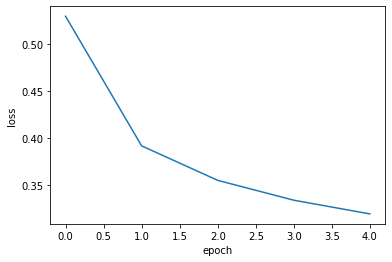

In [ ]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

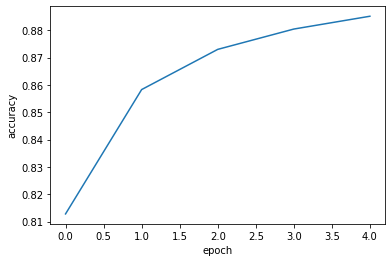

In [ ]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

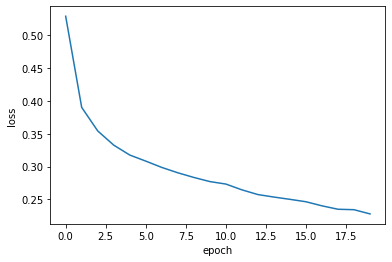

In [ ]:
# 에포크 횟수를 20으로 늘려보기

model = model_fn() # 모델 객체 생성
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###**검증 손실**

In [ ]:
# Epoch마다 검증 손실 계산하기
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


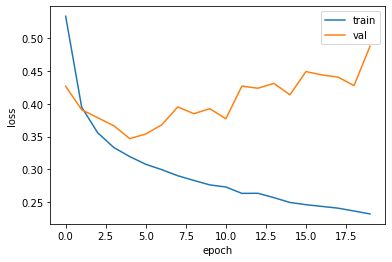

In [ ]:
# 훈련 손실과 검증 손실을 한 번에 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 초기에 검증 손실이 감소하다가 epoch = 5만에 다시 상승
# 훈련 손실은 꾸준히 감소하고 있다.
# -> 과대적합 모델

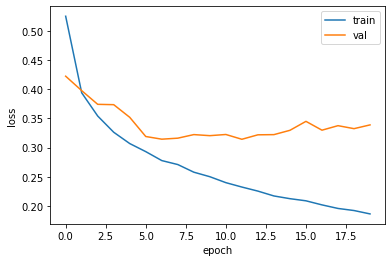

In [ ]:
# optimizer 조정(하이퍼-파라미터 튜닝)

model = model_fn()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
                    validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###**드롭아웃**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


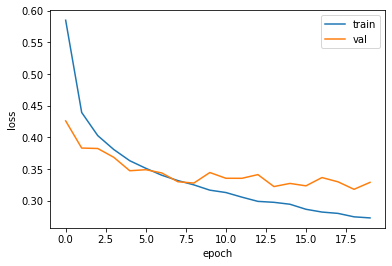

In [ ]:
# 훈련 손실과 검증 손실 그래프를 그려 비교하기
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###**모델 저장과 복원**

In [ ]:
# Epoch = 10으로 지정하여 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 10,verbose = 0,validation_data = (val_scaled,val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jul 16 12:31 model-weights.h5
-rw-r--r-- 1 root root 982664 Jul 16 12:31 model-whole.h5


In [ ]:
# 1. 훈련을 하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터 적재
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
# 검증 정확도 확인하기
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis = -1)
print(np.mean(val_labels == val_target))

0.8786666666666667


In [ ]:
# 2. 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8787


[0.33750826120376587, 0.8786666393280029]

###**콜백**

In [ ]:
modle = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
          validation_data = (val_scaled,val_target),
          callbacks = [checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.8841


[0.31815099716186523, 0.8840833306312561]

In [ ]:
# EarlyStopping & ModelCheckpoint 콜백 사용하기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target),callbacks = [checkpoint_cb,early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

11


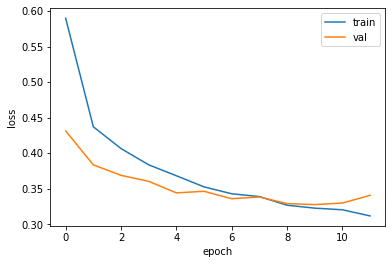

In [ ]:
# 훈련 손실과 검증 손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 검증 세트에 대한 성능 확인하기
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3278 - accuracy: 0.8805


[0.3277933895587921, 0.8805000185966492]